# Linear Regressor
Neste notebook usamos regressão linear para tentar prever a coluna 'price' (preço) do dataset de veículos do craiglist.

In [1]:
from Utils import *
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()

from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 4)
rcParams['figure.dpi'] = 100
rcParams['font.size'] = 8
rcParams['font.family'] = 'sans-serif'
rcParams['lines.linewidth'] = 2.0

LINEAR_REGRESSION_EXPERIMENT = "LinearRegression"
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
train_df = load_vehicles_dataset_and_set_types_2('../datasets/regressor/train_regressor_vehicles.csv')
train_df = set_categories_as_codes(train_df)

## Verificando as condições de linearidade
Primeiro vamos verificar se o nosso dataset satisfaz as condições de linearidade para utilizarmos o regressor linear.

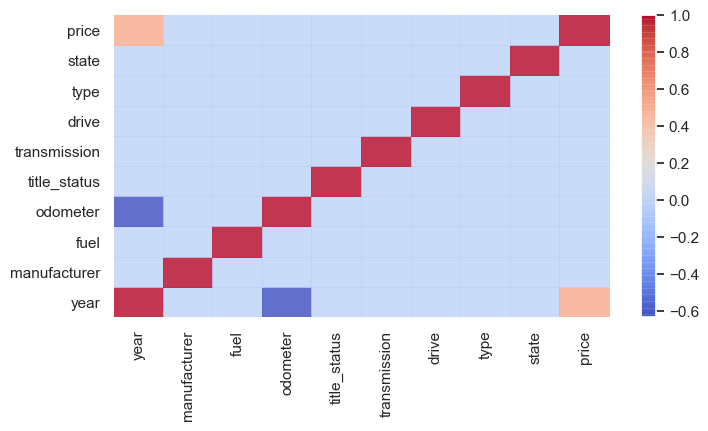

In [5]:
visualize_correlation_matrix(train_df, hurdle=0.5)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

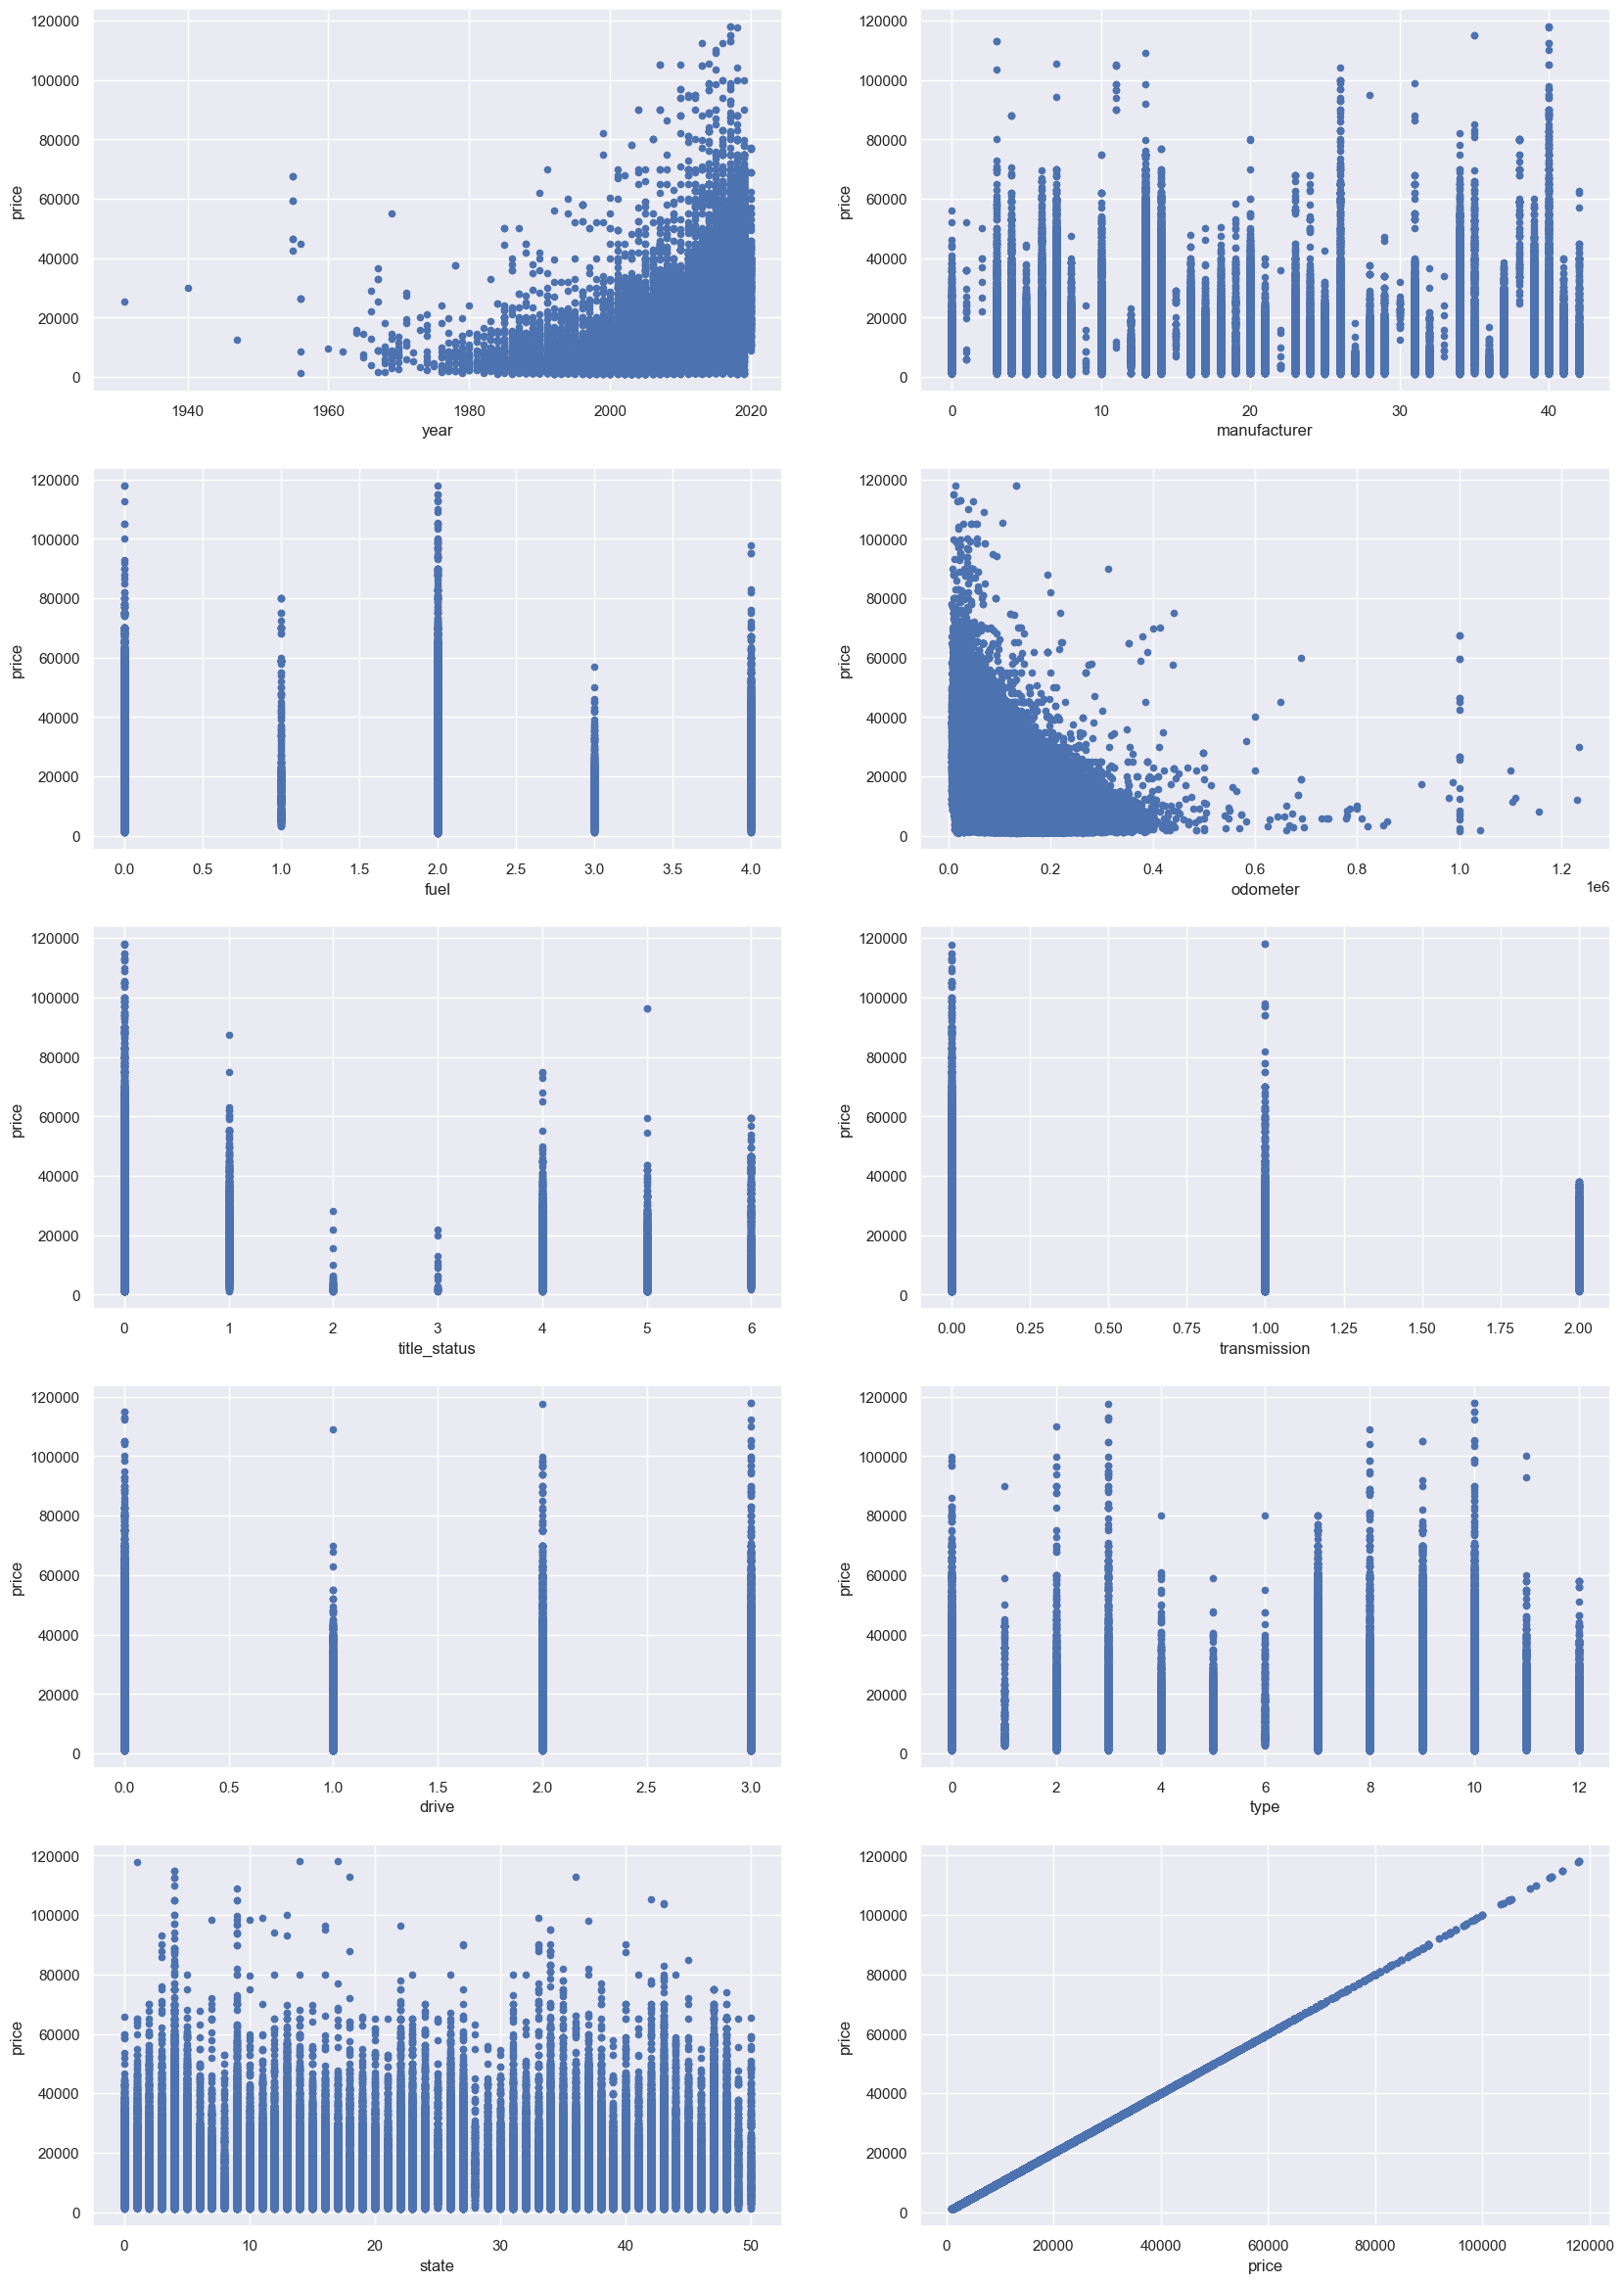

In [3]:
visualize_linear_correlation(train_df, train_df.columns, 'price')

De acordo com heatmap e com o scatter plot podemos notar que quase não existe um relação linear entre as variáveis e a coluna 'price'. Logo o regressor linear provavelmente não será o melhor algoritmo, porém vamos utilizar para comparar com o Random Forest Regressor.

## Treinamento do modelo

In [8]:
params = {'fit_intercept': True, 'normalize': True}
model = LinearRegression(fit_intercept=params['fit_intercept'], normalize=params['normalize'])

## Prevendo dataset de treino e de teste

In [4]:
test_df = load_vehicles_dataset_and_set_types_2('../datasets/regressor/test_regressor_vehicles.csv')
test_df = set_categories_as_codes(test_df)
run_regressor_and_track(train_df, 'train_regressor_vehicles.csv', test_df, 'test_regressor_vehicles.csv', model, LINEAR_REGRESSION_EXPERIMENT, 'price', 'LinearRegression', params)

train_R2: 0.4061
train_MSE: 62943931.4230
train_MAE: 5657.9273

test_R2: 0.4016
test_MSE: 63074296.3771
test_MAE: 5657.4041



Comparando as métricas de treino e teste podemos notar que o nosso modelo está em situação de underfitting. Como alternativa iremos utilizar One Hot Ecoding para aumetar o número de features do modelo e aumentar a complexidade.

## Utilizando one hot encoding

In [5]:
train_df = one_hot_encode_vehicle_dataset(train_df)
train_df.head()

,year,manufacturer,fuel,odometer,title_status,transmission,drive,type,state,price,...,state_41,state_42,state_43,state_44,state_45,state_46,state_47,state_48,state_49,state_50
0,2008,39,2,101646,0,0,1,4,3,7995,...,0,0,0,0,0,0,0,0,0,0
1,2014,34,0,145944,0,0,2,9,38,22990,...,0,0,0,0,0,0,0,0,0,0
2,2017,16,2,50480,0,0,1,3,1,14500,...,0,0,0,0,0,0,0,0,0,0
3,2014,39,2,107683,0,0,1,0,33,12329,...,0,0,0,0,0,0,0,0,0,0
4,2018,13,0,23330,0,0,0,7,24,42728,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df = one_hot_encode_vehicle_dataset(test_df)
test_df.head()

,year,manufacturer,fuel,odometer,title_status,transmission,drive,type,state,price,...,state_41,state_42,state_43,state_44,state_45,state_46,state_47,state_48,state_49,state_50
0,2014,21,2,110301,0,0,0,0,13,11998,...,0,0,0,0,0,0,0,0,0,0
1,2013,13,2,87623,0,0,0,9,47,27999,...,0,0,0,0,0,0,1,0,0,0
2,2017,21,2,42124,0,0,3,12,4,10970,...,0,0,0,0,0,0,0,0,0,0
3,2013,10,2,40175,0,2,3,8,9,7999,...,0,0,0,0,0,0,0,0,0,0
4,2006,13,0,84233,0,0,0,10,12,12500,...,0,0,0,0,0,0,0,0,0,0


In [9]:
run_regressor_and_track(train_df, 'train_regressor_vehicles.csv', test_df, 'test_regressor_vehicles.csv', model, LINEAR_REGRESSION_EXPERIMENT, 'price', 'LinearRegressionOneHotEncode', params)

train_R2: 0.6393
train_MSE: 38226112.7778
train_MAE: 4090.0065

test_R2: 0.6331
test_MSE: 38671806.8229
test_MAE: 4097.2704



Comparando com o resultado passado podemos notar que devido ao One Hot Encode o nosso modelo teve uma melhora significativa em todas as métricas, especialmente no R2 score, que passou de 0.40 para 0.63, uma melhoria de 0.23 pontos.  
  
Porém ainda assim as métricas são muito baixas para esse modelo ser considerado preciso.

## Otimizando hiperparâmetros
Vamos usar o optuna para otimizar os parâmetros 'fit_intercept' e 'normalize' do LinearRegressor

In [12]:
import optuna
import sklearn.model_selection

In [18]:
def objective(trial):
    validation_df = load_vehicles_dataset_and_set_types_2('../datasets/regressor/validation_regressor_vehicles.csv')
    validation_df = set_categories_as_codes(validation_df)
    
    x_df = validation_df.drop(columns=['price'])
    target = validation_df['price']
    
    classifier_name = trial.suggest_categorical("classifier", ["LinearRegressor"])
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    normalize = trial.suggest_categorical('normalize', [True, False])
    
    classifier_obj = LinearRegression(fit_intercept=fit_intercept, normalize=normalize)
    classifier_obj.fit(x_df, target)
    predict = classifier_obj.predict(x_df)

    metrics = eval_regressor_metrics(target, predict, False)
    r2 = metrics['test_r2']
    return r2

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)
print(study.best_trial)

[I 2020-11-17 00:03:30,371] A new study created in memory with name: no-name-3abf2d54-c59b-4df2-94da-0f0b2a6ac253
[I 2020-11-17 00:03:30,537] Trial 0 finished with value: 0.3312494576752588 and parameters: {'classifier': 'LinearRegressor', 'fit_intercept': False, 'normalize': False}. Best is trial 0 with value: 0.3312494576752588.
[I 2020-11-17 00:03:30,679] Trial 1 finished with value: 0.3312494576752588 and parameters: {'classifier': 'LinearRegressor', 'fit_intercept': False, 'normalize': False}. Best is trial 0 with value: 0.3312494576752588.
[I 2020-11-17 00:03:30,844] Trial 2 finished with value: 0.39854883592324375 and parameters: {'classifier': 'LinearRegressor', 'fit_intercept': True, 'normalize': True}. Best is trial 2 with value: 0.39854883592324375.
[I 2020-11-17 00:03:30,997] Trial 3 finished with value: 0.3312494576752588 and parameters: {'classifier': 'LinearRegressor', 'fit_intercept': False, 'normalize': True}. Best is trial 2 with value: 0.39854883592324375.
[I 2020-11

FrozenTrial(number=4, value=0.3985488359232445, datetime_start=datetime.datetime(2020, 11, 17, 0, 3, 30, 998046), datetime_complete=datetime.datetime(2020, 11, 17, 0, 3, 31, 144751), params={'classifier': 'LinearRegressor', 'fit_intercept': True, 'normalize': False}, distributions={'classifier': CategoricalDistribution(choices=('LinearRegressor',)), 'fit_intercept': CategoricalDistribution(choices=(True, False)), 'normalize': CategoricalDistribution(choices=(True, False))}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=4, state=TrialState.COMPLETE)


A partir dessa análise podemos notar que os melhores hiperparâmetros são:
- 'fit_intercept' = True
- 'normalize' = False

Rodando mais uma vez o experimento com os hiperparâmetros encontrados:

In [20]:
params = {'fit_intercept': True, 'normalize': False}
model = LinearRegression(fit_intercept=params['fit_intercept'], normalize=params['normalize'])
run_regressor_and_track(train_df, 'train_regressor_vehicles.csv', test_df, 'test_regressor_vehicles.csv', model, LINEAR_REGRESSION_EXPERIMENT, 'price', 'LinearRegressionOneHotEncodeWithTunning', params)

train_R2: 0.6396
train_MSE: 38197577.9361
train_MAE: 4086.2168

test_R2: 0.6334
test_MSE: 38642956.2588
test_MAE: 4093.0509



Com a otimização de hiperparâmetro tivemos uma melhora sutil nos resultados, porém como ja era esperado devido à não linearidade dos dados no nosso dataset, o LinearRegressor não apresentou bons resultados.  
  
Os resultados desse experimento podem ser comparados melhor pelo MLflow UI, no experimento de LinearRegression.